In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


# Load Dataset:

In [40]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [41]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [43]:
df.duplicated().sum()

0

In [44]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [45]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [46]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [47]:
df.drop(columns=["RowNumber","CustomerId",'Surname'],inplace = True)

In [48]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [49]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)


In [50]:
df = df.astype(int)

In [51]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0,2,1,0,96270,0,0,0,1
9996,516,35,10,57369,1,1,1,101699,0,0,0,1
9997,709,36,7,0,1,0,1,42085,1,0,0,0
9998,772,42,3,75075,2,1,0,92888,1,1,0,1


# Split Data:
1. into Independent and Dependent Variable
2. Train test split

In [52]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [53]:
X.shape,y.shape

((10000, 11), (10000,))

In [54]:
X_train.shape,Y_train.shape

((8000, 11), (8000,))

In [55]:
# Scalling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

# Built Neural Network:

In [57]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [58]:
model = Sequential()

In [59]:
# model.add(Dense(3,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='relu',input_dim=11))# hidden layer
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(1,activation='sigmoid')) # output layer

In [60]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

# Train Neural Network:

In [61]:
# compile model: use loss funtion ,gradient
# model.compile(loss='binary_crossentropy',optimizer='Adam')
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [62]:
# model.fit(X_train_scaled,Y_train,epochs=10)
history = model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7741 - loss: 0.5567 - val_accuracy: 0.8081 - val_loss: 0.4727
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8163 - loss: 0.4499 - val_accuracy: 0.8144 - val_loss: 0.4412
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8248 - loss: 0.4248 - val_accuracy: 0.8175 - val_loss: 0.4300
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8383 - loss: 0.4037 - val_accuracy: 0.8250 - val_loss: 0.4233
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8404 - loss: 0.3980 - val_accuracy: 0.8231 - val_loss: 0.4186
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8294 - loss: 0.4146 - val_accuracy: 0.8294 - val_loss: 0.4137
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8357 - loss: 0.4064 - val_accuracy: 0.8269 - val_loss: 0.4108
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8446 - loss: 0.3956 - val_accu

In [63]:
import matplotlib.pyplot as plt

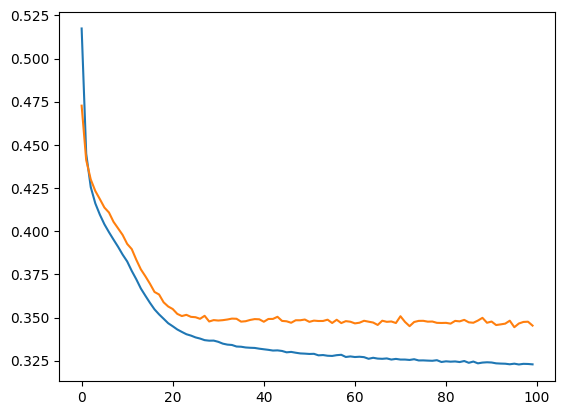

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

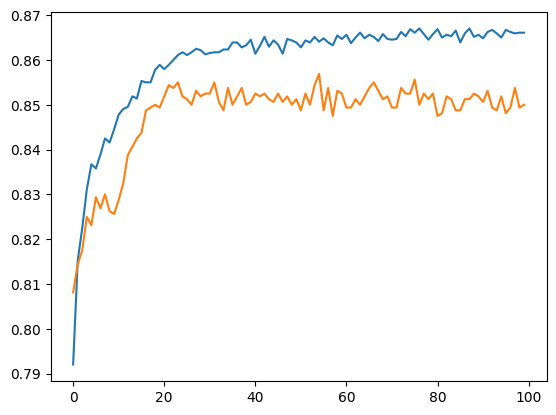

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [66]:
model.layers[0].get_weights()

[array([[-0.25059366, -0.04203839, -0.02727649, -0.2633848 ,  0.51084554,
         -0.20219858, -0.17560025,  0.05666484,  0.00754696, -0.08664898,
          0.2719094 ],
        [ 0.14549981, -0.62199557, -0.55217105,  1.2048361 ,  0.39749447,
         -0.3452039 ,  0.3896752 ,  0.4886057 ,  0.14117159,  0.13672222,
         -0.6282958 ],
        [-0.3511735 , -0.08011129, -0.11235794,  0.09848332,  0.21601146,
          0.12041932,  0.02817789, -0.2318751 ,  0.10080902, -0.06281073,
         -0.20691165],
        [ 0.08409932, -0.533463  , -0.25008777, -0.43475252, -0.59760445,
         -0.04597768,  0.105975  ,  0.07087454, -0.49140596, -0.52277666,
         -0.04846062],
        [-0.00399078, -0.27398387, -0.14663419, -0.43013948,  0.11658332,
          0.2252306 ,  1.0880247 ,  0.07993747, -0.1442006 , -1.4466376 ,
         -0.07086585],
        [-0.4309143 , -0.20411919, -0.5859456 , -0.12243168, -0.37274745,
          0.68906355,  0.19454563,  0.04043036, -0.07212655,  0.0810615

# Predict Neural Network:

In [67]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [68]:
Y_pred = np.where(y_log>0.5,1,0)

In [69]:
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

# Evaluation:

In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.86